In [12]:
from __future__ import division
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14,10)
import matplotlib.pyplot as plt
from scipy.signal import welch

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from src.freqDomain import freqDomain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
end_idx=int(66800)
#hoft = np.loadtxt('../SGWB_withnoise_full.txt')
hoft = np.loadtxt('../noisless_mldc.txt')
times, hX, hY, hZ = hoft[0:end_idx, 0], hoft[0:end_idx, 1], hoft[0:end_idx, 2], hoft[0:end_idx, 3]

In [31]:
## PSD of the data
fs = 1.0/(times[1] - times[0])
fx, Sx = welch(hX,fs=fs, nperseg=int(1e4*fs) )
fx, Sx = fx[1:], Sx[1:]

In [32]:
## antenna pattern
Larm=2.5e9
cspeed=3e8
fstar = cspeed/(2*np.pi*Larm)


fd = freqDomain()
Fx, Fy, Fz = fd.tdi_isgwb_xyz_response(0.5*fx/fstar)

In [68]:
## theoretical PSD
Na = (3.0e-15)**2 * (1 + (4e-4/fx)**2) *  (1  + (fx/8e-3)**4) *(1.0/(2*np.pi*fx))**4 * (2*np.pi*fx/cspeed)**2
Np = (15e-12)**2 * (1 + (2e-3/fx)**4) *(2*np.pi*fx/cspeed)**2

#Sx_instr = 2*16 * (np.sin(fx/fstar))**2 * (Np + 2 * Na * (np.sin(2*fx/fstar))**2 )

Sx_instr = 16.0 * np.sin(fx/fstar)**2 * (2.0 * (1.0 + np.cos(fx/fstar)**2) * Na + Np)

omega_f = 3.5e-9 * (fx/25)**0.667
H0 = 2.2*10**(-18)

Fx_prime = (2*np.sin(fx/fstar))**2 * 0.3 ## * 1/ (1 + 0.6* (fx/fstar)**2)


Sx_gw = omega_f * (3*H0**2)/(4 * np.pi**2 * fx**3) * Fx * (4*np.pi*fx*Larm/cspeed)**2
Sx_gw_prime = omega_f * (3*H0**2)/(4 * np.pi**2 * fx**3) * Fx_prime * (4*np.pi*fx*Larm/cspeed)**2


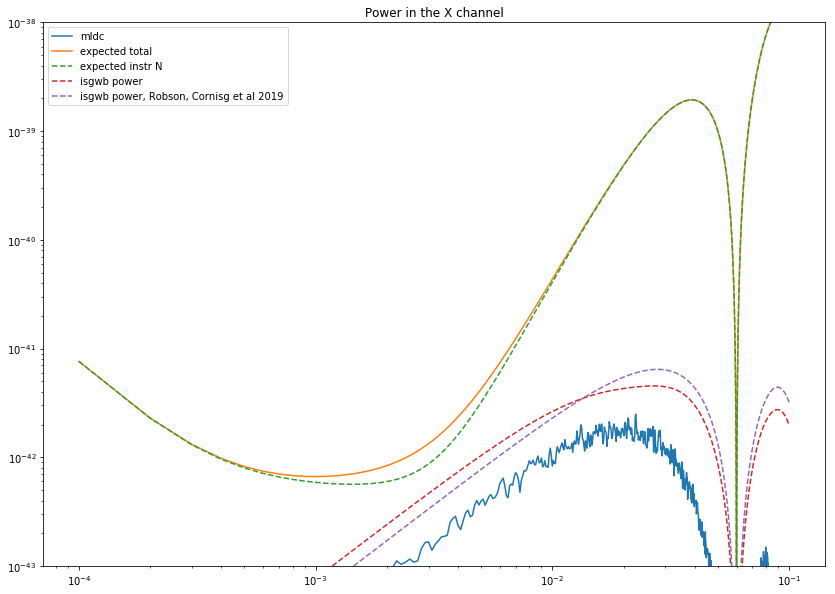

In [69]:
plt.loglog(fx, Sx, label='mldc')
plt.loglog(fx, Sx_instr + Sx_gw, label='expected total')
plt.loglog(fx, Sx_instr,'--' ,  label='expected instr N')
plt.loglog(fx, Sx_gw,'--' , label='isgwb power')
plt.loglog(fx, Sx_gw_prime,'--' , label='isgwb power, Robson, Cornisg et al 2019')
plt.title('Power in the X channel')
plt.ylim(1e-43, 1e-38)
plt.legend()

In [57]:
hA = (1.0/3.0)*(2*hX - hY - hZ)
fs = 1.0/(times[1] - times[0])
fA, SA = welch(hA,fs=fs, nperseg=int(1e4*fs) )
fA, SA = fA[1:], SA[1:]

In [58]:
FA, FE, FT = fd.tdi_isgwb_response(0.5*fA/fstar)

In [64]:
SA_instr = (16.0/3.0) * ((np.sin(fA/fstar))**2) * Np*(np.cos(fA/fstar) + 2) \
            + (16.0/3.0) * ((np.sin(fA/fstar))**2) * Na*(4*np.cos(fA/fstar) + 2*np.cos(2*fA/fstar) + 6)

omega_f = 3.5e-9 * (fx/25)**0.667
H0 = 2.2*10**(-18)


SA_gw = omega_f * (3*H0**2)/(4 * np.pi**2 * fx**3) * FA * (4*np.pi*fx*Larm/cspeed)**2


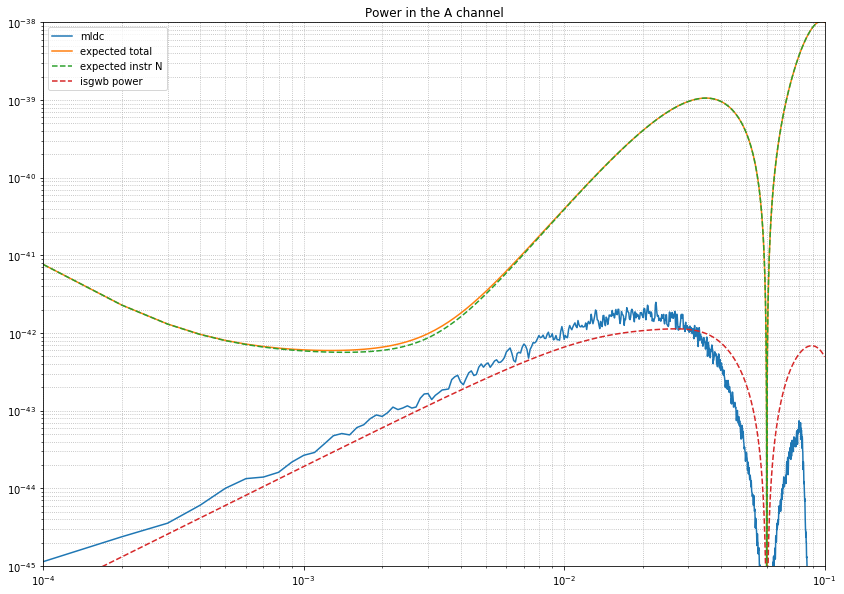

In [65]:
plt.loglog(fA, SA, label='mldc')
plt.loglog(fA, SA_instr + SA_gw, label='expected total')
plt.loglog(fA, SA_instr,'--' ,  label='expected instr N')
plt.loglog(fA, SA_gw,'--' , label='isgwb power')
plt.title('Power in the A channel')
plt.ylim(1e-45, 1e-38)
plt.xlim(1e-4, 1e-1)
plt.grid( linestyle=':', which='both')
plt.legend()

In [61]:
85/6048

0.014054232804232803

In [121]:
np.log10(3.6e-49)

-48.44369749923271